In [1]:
import os

import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
import urllib.request
import seaborn as sns
import plotly.express as px
import folium
from random import sample
import geopandas as gpd
from adjustText import adjust_text

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

/Users/chloeroudaut/anaconda3/envs/myenv/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('scaled_features.csv')

In [3]:
data

,customer_id,recency,frequency,monetary,avg_order_value,std_order_value,unique_products_count,avg_delivery_time,avg_review_score,installment_payment_count
0,00012a2ce6f8dcda20d059ce98491703,0.310542,-0.264131,-0.150245,-0.199300,-0.073734,-0.167434,0.127401,-2.339287,0.556874
1,000161a058600d5901f007fab4c27140,1.105700,-0.264131,-0.227784,-0.417887,-0.073734,-0.167434,-0.293031,-0.080717,0.556874
2,0001fd6190edaaf884bcaf3d49edf079,2.005140,-0.264131,-0.018070,0.173308,-0.073734,-0.167434,-0.713462,0.672140,0.556874
3,0002414f95344307404f0ace7a26f1d5,0.903651,-0.264131,-0.044397,0.099091,-0.073734,-0.167434,1.704020,0.672140,-0.838690
4,000379cdec625522490c315e70c7a9fb,-0.588899,-0.264131,-0.162909,-0.235000,-0.073734,-0.167434,-0.082815,-0.080717,-0.838690
...,...,...,...,...,...,...,...,...,...,...
96243,fffcb937e9dd47a13f05ecb8290f4d3e,-0.484616,-0.264131,-0.187646,-0.304737,-0.073734,-0.167434,-0.818570,0.672140,0.556874
96244,fffecc9f79fd8c764f843e9951b11341,-0.569345,2.404854,-0.204930,-0.603960,1.870409,-0.167434,0.022293,-0.833574,-0.838690
96245,fffeda5b6d849fbd39689bb92087f431,-0.914783,-0.264131,-0.234795,-0.437653,-0.073734,-0.167434,0.547833,-0.080717,0.556874
96246,ffff42319e9b2d713724ae527742af25,-1.064690,-0.264131,0.012582,0.259717,-0.073734,-0.167434,-0.713462,0.672140,0.556874


In [4]:
data.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'avg_order_value',
       'std_order_value', 'unique_products_count', 'avg_delivery_time',
       'avg_review_score', 'installment_payment_count'],
      dtype='object')

In [5]:
# 2. Préparation des données
# Sélection des features pour le clustering (excluons customer_id)
features = ['recency', 'frequency', 'monetary', 'avg_order_value', 'std_order_value', 
            'unique_products_count', 'avg_delivery_time', 'avg_review_score', 'installment_payment_count']

X = data[features]

# 3. Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes quantitatives
df_quant = data.select_dtypes(include=[float])

# Standardisation des données 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quant)

# Application de PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Calcul du nombre de composantes nécessaires pour expliquer 90% de la variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Trouver le nombre minimum de composantes telles que 90% de la variance soit expliquée
num_components = np.where(cumulative_variance >= 0.9)[0][0] + 1

print(f"{num_components} composantes principales sont nécessaires pour expliquer 90% de la variance.")

8 composantes principales sont nécessaires pour expliquer 90% de la variance.


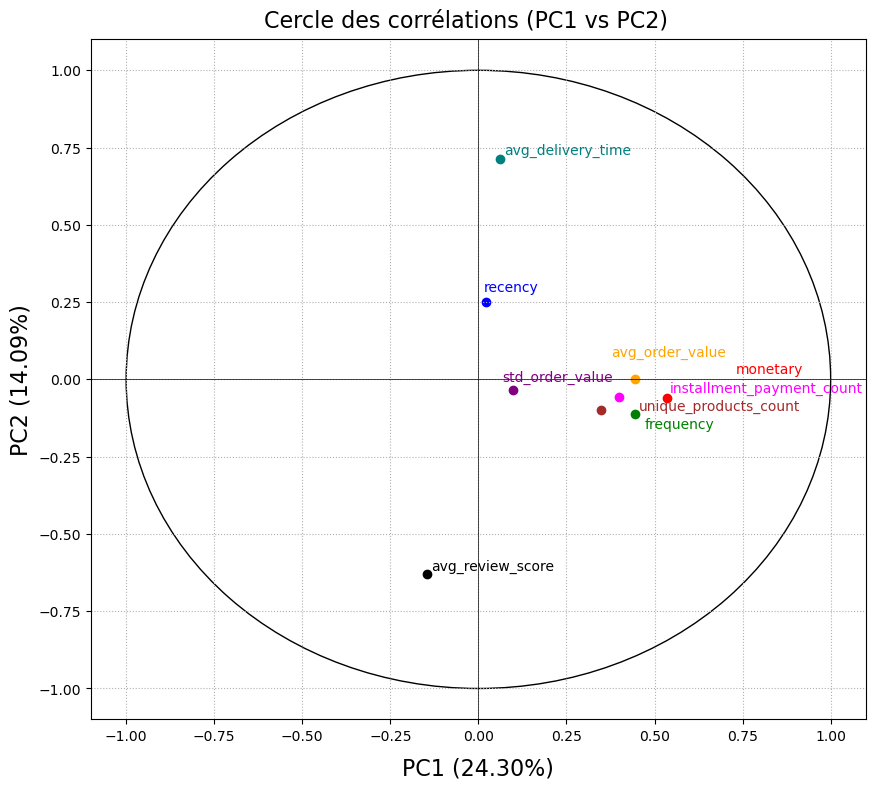

,PC1,PC2
recency,0.020420,0.251274
frequency,0.445147,-0.110674
monetary,0.536639,-0.059839
avg_order_value,0.443977,0.001347
std_order_value,0.097949,-0.033867
unique_products_count,0.348496,-0.097944
avg_delivery_time,0.062110,0.714607
avg_review_score,-0.145876,-0.629516
installment_payment_count,0.400185,-0.057765


In [7]:
# Sélectionner les colonnes quantitatives
df = data.select_dtypes(include=[float])
    
# Normaliser les données
X = StandardScaler().fit_transform(df)
    
# Effectuer l'ACP
n_components = max(1, 2)
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)
    
# Standardiser les points dans l'espace des axes principaux
X_pca_standardized = X_pca / np.sqrt(pca.singular_values_)
    
# Créer le plot cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
    
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown','teal', 'black', 'magenta', 'lime', 'olive', 'silver']
    
texts = []
for i in range(len(pca.components_[1-1])):
    x = pca.components_[1-1][i]
    y = pca.components_[2-1][i]
    point = ax.scatter(x, y, color=colors[i % len(colors)])
    texts.append(ax.text(x, y, df.columns[i], color=colors[i % len(colors)]))
        
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)
    
explained_variance_ratio_x = pca.explained_variance_ratio_[1-1] * 100
explained_variance_ratio_y = pca.explained_variance_ratio_[2-1] * 100
    
plt.xlabel(f'PC{1} ({explained_variance_ratio_x:.2f}%)', fontsize=16, labelpad=10)
plt.ylabel(f'PC{2} ({explained_variance_ratio_y:.2f}%)', fontsize=16)
    
plt.suptitle(f'Cercle des corrélations (PC{1} vs PC{2})', y=0.91, fontsize=16)
    
# Ajuster les marges pour éviter les coupures des textes
plt.subplots_adjust(bottom=0.2)
    
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
    
adjust_text(texts)
ax.grid(True, linestyle='dotted')

plt.show()
    
# Créer un DataFrame pour afficher les projections des colonnes sur les composantes principales spécifiées
components = pca.components_[[1-1, 2-1]]
index = [f'PC{1}', f'PC{2}']
df_pca = pd.DataFrame(components, columns=df.columns, index=index).T

# Appliquer une fonction de mise en forme aux cellules du DataFrame
def color_cells(val):
    color = 'green' if abs(val) >= 0.7 else 'red'
    return f'background-color: {color}'

display(df_pca.style.applymap(color_cells))

In [8]:
def ajouter_colonnes_PCA(df, nb_PCA=2):
    df_copy = df.copy()  # Create a copy of the input DataFrame
    
    float_cols = df_copy.select_dtypes(include=['float']).columns
    float_df = df_copy[float_cols]
    
    pca = PCA(n_components=nb_PCA)
    pca_components = pca.fit_transform(float_df)
    
    for i in range(nb_PCA):
        col_name = 'PCA' + str(i + 1)
        df_copy[col_name] = pca_components[:, i]
        
    return df_copy

In [9]:
df_pca = ajouter_colonnes_PCA(df, nb_PCA=8)

In [10]:
df_pca

,recency,frequency,monetary,avg_order_value,std_order_value,unique_products_count,avg_delivery_time,avg_review_score,installment_payment_count,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,0.310542,-0.264131,-0.150245,-0.199300,-0.073734,-0.167434,0.127401,-2.339287,0.556874,0.226093,1.666375,-0.527678,-0.289080,0.315777,0.282704,-1.635401,0.001046
1,1.105700,-0.264131,-0.227784,-0.417887,-0.073734,-0.167434,-0.293031,-0.080717,0.556874,-0.251913,0.148272,-0.382525,0.161347,-1.079474,-0.248875,-0.651279,-0.052807
2,2.005140,-0.264131,-0.018070,0.173308,-0.073734,-0.167434,-0.713462,0.672140,0.556874,0.005534,-0.411854,0.091721,0.463591,-2.154097,-0.144955,-0.570213,-0.213048
3,0.903651,-0.264131,-0.044397,0.099091,-0.073734,-0.167434,1.704020,0.672140,-0.838690,-0.472370,1.121011,0.575416,0.398549,-0.818104,-0.131800,1.525491,-0.078941
4,-0.588899,-0.264131,-0.162909,-0.235000,-0.073734,-0.167434,-0.082815,-0.080717,-0.838690,-0.715933,-0.050334,0.212960,-0.111047,0.635252,0.477805,0.191667,0.067524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96243,-0.484616,-0.264131,-0.187646,-0.304737,-0.073734,-0.167434,-0.818570,0.672140,0.556874,-0.355078,-1.103071,-0.096866,-0.232011,0.095735,-0.571386,-0.359067,-0.065317
96244,-0.569345,2.404854,-0.204930,-0.603960,1.870409,-0.167434,0.022293,-0.833574,-0.838690,0.592976,0.144413,-1.256667,1.967931,1.486167,0.808469,0.234891,1.551241
96245,-0.914783,-0.264131,-0.234795,-0.437653,-0.073734,-0.167434,0.547833,-0.080717,0.556874,-0.253484,0.241858,-0.220493,-0.406148,0.797844,-0.878917,0.062571,-0.016992
96246,-1.064690,-0.264131,0.012582,0.259717,-0.073734,-0.167434,-0.713462,0.672140,0.556874,-0.002340,-1.184939,0.356513,-0.419054,0.609082,-0.636889,-0.246467,-0.167203


In [11]:
df_features = df_pca.loc[:, ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8"]]

In [12]:
def cluster_analysis_k_means(df):
    # Sélectionner uniquement les colonnes quantitatives
    numeric_columns = df.select_dtypes(include=[np.number])
    
    # Normaliser les données
    scaler = StandardScaler()
    numeric_columns_scaled = scaler.fit_transform(numeric_columns)

    results = []
    for k in range(3, ):  # Tester K de 1 à 10
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(numeric_columns)
        labels = kmeans.labels_

        # Calculer les scores pour chaque K
        if k > 1:  # les métriques de silhouette et Davies-Bouldin nécessitent au moins 2 clusters
            silhouette = silhouette_score(numeric_columns, labels)
            davies_bouldin = davies_bouldin_score(numeric_columns, labels)
        else:
            silhouette = None
            davies_bouldin = None

        results.append({
            'K': k,
            'Silhouette': silhouette,
            'Davies-Bouldin': davies_bouldin
        })

    # Convertir en DataFrame
    results_df = pd.DataFrame(results)

    # Ajouter les classements
    results_df['Silhouette Rank'] = results_df['Silhouette'].rank(ascending=False, method='min', na_option='bottom')
    results_df['Davies-Bouldin Rank'] = results_df['Davies-Bouldin'].rank(ascending=True, method='min', na_option='bottom')

    # Ajouter une nouvelle colonne pour la moyenne des rangs
    results_df['Rank Mean'] = results_df[['Silhouette Rank', 'Davies-Bouldin Rank']].mean(axis=1)

    # Ajouter une nouvelle colonne pour le rang final, basé sur la moyenne des rangs
    results_df['Rank Final'] = results_df['Rank Mean'].rank(method='min')

    # Trier le DataFrame par 'Rank Final'
    results_df = results_df.sort_values(by='Rank Final')

    # Afficher les résultats
    return results_df

In [13]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

KeyboardInterrupt: 

### PCA TEST

In [ ]:
numeric_features = data.select_dtypes(include=[float, int])

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Appliquer l'ACP
pca = PCA()
pca_result = pca.fit_transform(numeric_features)

# Tracer la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par composante principale')
plt.grid(True)
plt.show()


In [ ]:
# Afficher les variances expliquées
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

In [ ]:
# Vérifiez les dimensions des données
num_variables = pca.components_.shape[1]
num_features = data.shape[1]

print(f"Nombre de variables dans PCA: {num_variables}")
print(f"Nombre de variables dans les données initiales: {num_features}")

# Ajustez les indices si nécessaire
if num_variables != num_features:
    print("Les dimensions des données initiales et des composantes PCA ne correspondent pas.")
else:
    # Analyser l'importance des variables dans les deux premières composantes
    n_components = min(2, pca.n_components_)
    components = pd.DataFrame(
        pca.components_[:n_components].T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=data.columns
    )

    # Afficher les 10 variables les plus importantes pour chaque composante
    print("\nTop 10 variables pour PC1:")
    print(components['PC1'].abs().sort_values(ascending=False).head(10))

    if n_components > 1:
        print("\nTop 10 variables pour PC2:")
        print(components['PC2'].abs().sort_values(ascending=False).head(10))

### KMEANS

In [ ]:
# 4. K-means clustering
# Nous allons essayer avec 3 à 6 clusters
n_clusters_range = range(3, 7)
inertias = []
silhouette_scores = []

In [ ]:
sample_size = 10000  # Ajustez selon vos besoins
X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False)]

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_sample)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_sample, kmeans.labels_))

In [ ]:

# 6. Choix du nombre optimal de clusters
# Basé sur les graphiques, choisissez le nombre optimal de clusters
optimal_clusters = 4  # À ajuster en fonction des résultats

# 7. Application du K-means final
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# 8. Ajout des labels de cluster au DataFrame original
data['Cluster'] = cluster_labels

# 9. Analyse des clusters
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[features].mean())

# 10. Visualisation 2D (utilisant les deux premières features comme exemple)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Clusters K-means')
plt.colorbar(scatter)
plt.show()

Cluster 0 : "Clients satisfaits mais lents"

Caractéristiques principales : Temps de livraison très long (0.891222), satisfaction client très basse (-1.867674)
Comportement : Proche de la moyenne sur la plupart des autres métriques
Interprétation : Ces clients semblent tolérer des temps de livraison longs, mais cela affecte négativement leur satisfaction. Ils restent des clients moyens en termes de fréquence et de valeur monétaire.


Cluster 1 : "Clients récents et satisfaits"

Caractéristiques principales : Récence très élevée (0.992312), satisfaction client au-dessus de la moyenne (0.372376)
Comportement : Légèrement en dessous de la moyenne pour la fréquence et la valeur monétaire
Interprétation : Ce groupe semble représenter des clients récents, potentiellement des nouveaux clients, qui sont satisfaits de leur expérience mais n'ont pas encore établi un historique d'achat important.


Cluster 2 : "Clients VIP à haute valeur"

Caractéristiques principales : Fréquence très élevée (2.518793), valeur monétaire élevée (1.518417), grande variété de produits achetés (3.597001)
Comportement : Au-dessus de la moyenne sur presque toutes les métriques, sauf la satisfaction client (-0.484530)
Interprétation : Ce sont vos clients les plus précieux, qui achètent fréquemment, dépensent beaucoup et achètent une grande variété de produits. Cependant, leur satisfaction est légèrement inférieure à la moyenne, ce qui pourrait être un point d'attention.


Cluster 3 : "Clients anciens et satisfaits"

Caractéristiques principales : Récence très basse (-0.755499), satisfaction client au-dessus de la moyenne (0.409067)
Comportement : Légèrement en dessous de la moyenne pour la plupart des autres métriques
Interprétation : Ces clients n'ont pas acheté récemment, mais restent satisfaits. Ils pourraient être des clients fidèles qui n'ont pas eu besoin de faire un achat récemment, ou des clients à risque de churn malgré leur satisfaction.
Recommandations :


Pour le Cluster 0 : Améliorez les temps de livraison pour augmenter la satisfaction client.

Pour le Cluster 1 : Concentrez-vous sur la rétention et l'augmentation de la valeur de ces nouveaux clients satisfaits.

Pour le Cluster 2 : Investiguer pourquoi ces clients VIP ont une satisfaction inférieure à la moyenne et mettez en place des actions pour l'améliorer.

Pour le Cluster 3 : Lancez une campagne de réactivation pour encourager ces clients satisfaits à faire de nouveaux achats.

Cette segmentation vous permet de cibler vos efforts marketing et d'amélioration de service en fonction des caractéristiques spécifiques de chaque groupe de clients.


In [ ]:
import seaborn as sns

features_to_plot = ['recency', 'frequency', 'monetary']
sns.pairplot(data[features_to_plot + ['Cluster']], hue='Cluster', plot_kws={'alpha': 0.5})
plt.show()

In [ ]:
from math import pi

def make_spider(df, row, title, color):
    categories = list(df.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(2, 2, row+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_title(title)
    
    values = df.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

# Préparer les données
cluster_means = data.groupby('Cluster')[features].mean()
cluster_means_scaled = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Créer le plot
plt.figure(figsize=(12, 10))
colors = ['b', 'g', 'r', 'y']
for i in range(4):
    make_spider(cluster_means_scaled, i, f'Cluster {i}', colors[i])
plt.tight_layout()
plt.show()

In [ ]:
cluster_means = data.groupby('Cluster')[features].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Means Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for feature in ['recency', 'frequency', 'monetary']:
    plt.subplot(1, 3, features.index(feature) + 1)
    for cluster in range(4):
        sns.histplot(data[data['Cluster'] == cluster][feature], 
                     label=f'Cluster {cluster}', kde=True, alpha=0.5)
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Créer le graphique à barres
ax = data['frequency'].value_counts().sort_index().plot(kind='bar')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Ajouter les titres et labels
plt.title('Répartition de la Frequency')
plt.xlabel('frequency')
plt.ylabel('Count')
plt.show()

Cette répartition nous indique qu'il va être impossible de créer des quartiles sur la colonne "frequency", la répartition est beaucoup trop inégale:
On va par conséquent segmenter de cette manière:

G1: 1 achat
G2: 2 achats
G3: 3 achats
G4: Plus de 3 achats

### DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5  # Vous pouvez ajuster cette valeur
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Trier les distances au k-ième voisin le plus proche
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points triés par distance')
plt.ylabel('k-ième distance la plus proche')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Application de DBSCAN
eps = 0.75  # À ajuster en fonction du graphique
min_samples = 5  # À ajuster selon vos besoins

dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Ajout des labels au DataFrame
data['DBSCAN_Cluster'] = dbscan_labels

# 4. Analyse des clusters
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Nombre de clusters: {n_clusters}")
print(f"Nombre de points de bruit: {n_noise}")

for cluster in set(dbscan_labels):
    if cluster != -1:
        cluster_data = data[data['DBSCAN_Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(cluster_data[features].mean())

# 5. Visualisation 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Clusters DBSCAN')
plt.colorbar(scatter)
plt.show()

# 6. Comparaison avec K-means
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clusters')
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.show()


In [ ]:
from collections import Counter
cluster_sizes = Counter(dbscan_labels)
print(cluster_sizes.most_common())


In [ ]:
for cluster in set(dbscan_labels):
    if cluster != -1:  # Ignore les points de bruit
        cluster_points = X_scaled[dbscan_labels == cluster]
        if len(cluster_points) > 100:  # Ajustez ce seuil selon vos besoins
            print(f"Cluster {cluster} - Taille: {len(cluster_points)}")
            print(pd.DataFrame(cluster_points, columns=features).mean())
            print("\n")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualisation des clusters DBSCAN')
plt.show()

### ACH

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


# Sélectionner un échantillon aléatoire de 200 données
data_sample = data.sample(n=200, random_state=42)

# Sélectionner les colonnes pour le clustering (ajustez selon vos besoins)
features = ['recency', 'frequency', 'monetary', 'avg_order_value', 'std_order_value', 
            'unique_products_count', 'avg_delivery_time', 'avg_review_score', 'installment_payment_count']
X = data_sample[features]

# Normaliser les données
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Effectuer le clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

# Ajuster le modèle et obtenir les labels
clustering.fit(X_normalized)

# Fonction pour tracer le dendrogramme
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.title('Dendrogramme')
plt.xlabel('Nombre d\'échantillons dans le nœud (ou indice de l\'échantillon)')
plt.ylabel('Distance')
plt.show()

# Afficher les résultats
print(f"Nombre de clusters : {len(set(clustering.labels_))}")
print("Labels des clusters :", clustering.labels_)